In [413]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# cabecera:
# 0: Me identifico,
# 1: Tengo,
# 2: Argentina,
# 3: Años de experiencia,
# 4: Años en el puesto actual,
# 5: ¿Tenés gente a cargo?,
# 6: Nivel de estudios alcanzado,
# 7: Estado,
# 8: Carrera,
# 9: Realizaste cursos de especialización,
# 10: Trabajo de,
# 11: Tecnologías que utilizás,
# 12: Tecnologías que utilizás,
# 13: Tecnologías que utilizás,
# 14: Automation o funcional?,
# 15: Tecnologías que utilizás,
# 16: Tecnologías que utilizás,
# 17: ¿Tenés guardias?,
# 18: Cuánto cobrás por guardia (en tu moneda local),
# 19: "¿Porcentaje, bruto o neto?",
# 20: Tipo de contrato,
# 21: Salario mensual (en tu moneda local),
# 22:¿Bruto o neto?,
# 23: ¿Qué tan conforme estás con tu sueldo?,
# 24: Cómo creés que está tu sueldo con respecto a enero 2018,
# 25: Recibís algún tipo de bono,
# 26: A qué está atado el bono,
# 27: ¿Tuviste ajustes por inflación lo que va del año?,
# 28: ¿De qué % fue el ajuste?,
# 29: Cantidad de empleados,
# 30: ¿Cambiaste de empresa en los últimos 6 meses?,
# 31: ¿Cuál fue el principal motivo de cambio?,
# 32: Beneficios extra
# 33: Carga encuesta de remuneracion

# Columnas para analizar y nombres a utilizar
load_cols = [0,1,3,4,5,6,7,10,20,21,22,23]
loaded_cols_names = ['identifica','rango_edad', 'experiencia','tiempo_puesto_actual','gente_a_cargo',
                     'nivel_estudio', 'estado_estudio',
                     'puesto_actual','tipo_contrato','sueldo_mensual','tipo_sueldo','conforme_sueldo']

# Cargamos encuesta
encuesta = pd.read_csv('encuesta_remuneracion_salarial_2018_2_Argentina.csv',
                       header=0,na_values='-',encoding='utf-8', 
                       usecols=load_cols, names=loaded_cols_names)
# ejes = ejes.drop('area',1)[ejes['Participación'].notnull()]

In [515]:
# Funciones para categorizar 

def sueldo_neto(row):
    if row['tipo_sueldo'] == 'Bruto':
        return row['sueldo_mensual']
    else:
        return row['sueldo_mensual'] * 0.83

def cat_edades(row):
    if row['rango_edad'] in ['18 - 20','21 - 23']:
        return '18-23'
    elif row['rango_edad'] in ['24 - 26','27 - 30']:
        return '24-30'
    elif row['rango_edad'] in ['31 - 33','34 - 36','37 - 40']:
        return '31-40'
    elif row['rango_edad'] in ['41 - 45','46 - 49','50+']:
        return '41+'
    else:
        return None

def cat_experiencia(row):    
    if row['experiencia'] in ['Menos de un año']:
        return '0 (Menor a un año)'
    elif row['experiencia'] in ['1','2','3']:
        return '1-3'
    elif row['experiencia'] in ['4','5','6']:
        return '4-6'
    elif row['experiencia'] in ['7','8','9','10+']:
        return '7+'
    else:
        return None

def cat_puesto(row):
    if row['puesto_actual'] in ['Developer',
                         'SysAdmin / DevOps',
                         'PM',
                         'Architect',
                         'HelpDesk','QA / Tester',
                         'Designer',
                         'Infosec',
                         'DBA','Recruiter / HR']:
        return row['puesto_actual']
    else:
        return 'Otros'

# TODO: Revisar. Puede que queden muchas categorias.
def cat_estudio(row):
    nivel = row['nivel_estudio']
    estado = row['estado_estudio'].lower()
    if nivel in ['Posgrado','Doctorado']:
        nivel = 'Posgrado/Doctorado'
    if nivel == 'Primario' and estado == 'Completado':
        nivel = 'Secundario'
        estado = 'en curso/incompleto'
    if estado == 'completado':
        estado = 'completo'
    elif estado in ['en curso','incompleto']:
        estado = 'en curso/incompleto'
        
    return '{0} {1}'.format(nivel, estado)
    
encuesta['sueldo_neto'] = encuesta.apply(sueldo_neto, axis=1)
encuesta['cat_edades'] = encuesta.apply(cat_edades, axis=1)
encuesta['cat_experiencia'] = encuesta.apply(cat_experiencia, axis=1)
encuesta['cat_puesto'] = encuesta.apply(cat_puesto, axis=1)
encuesta['cat_estudio'] = encuesta.apply(cat_estudio, axis=1)
encuesta['lidera'] = np.where(encuesta['gente_a_cargo']>0, 'Si', 'No')                            


In [ ]:
# Los dato encuesta filtrados por el puesto. 
puesto = 'Developer'
encuesta_solo_puesto = encuesta[(encuesta['puesto_actual'] == puesto)]

In [731]:
# Para graficar dos graficos de torta
def get_subplots_sharing_x_or_y(sharey=True, figsize=None):
    if sharey == True:
        if figsize is None:
            figsize = (14,7)
        return subplot_sharing_y(figsize)
    else:
        if figsize is None:
            figsize = (7,14)       
        return subplot_sharing_x(figsize)

def subplot_sharing_x(figsize):
    return plt.subplots(2, sharex=True, figsize= figsize)

def subplot_sharing_y(figsize):
    return plt.subplots(1, 2, sharey=True, figsize=(10,5))

def legend_labels(series):
    series_total = series.sum()
    return ['%s %1.2f %%' % (name, 100 * value / series_total) for name, value in series.iteritems()]

def pie_chart_total_vs_puesto(encuesta, columna, puesto, graph_title, title_total, title_puesto, sub_plot_by_cols=True):
    fig, (ax, ax2) = get_subplots_sharing_x_or_y(sub_plot_by_cols)

    value_counts_total = encuesta[columna].value_counts()
    value_counts_puesto = encuesta[(encuesta['puesto_actual'] == puesto)][columna].value_counts()
    value_counts_total.plot.pie(ax=ax, title=title_total)
    value_counts_puesto.plot.pie(ax=ax2, title=title_puesto)
    ax.set(ylabel='')
    ax2.set(ylabel='')
    ax.legend(loc = 'upper left',bbox_to_anchor=(-0.5, 1),  labels=legend_labels(value_counts_total))
    if sub_plot_by_cols:
        ax2.legend(loc = 'upper right',bbox_to_anchor=(1.5, 1),  labels=legend_labels(value_counts_puesto))
    else:
        ax2.legend(loc = 'upper left',bbox_to_anchor=(-0.5, 1),  labels=legend_labels(value_counts_puesto))
        
    plt.suptitle(graph_title, fontsize=16)
    #plt.tight_layout()
    plt.show()

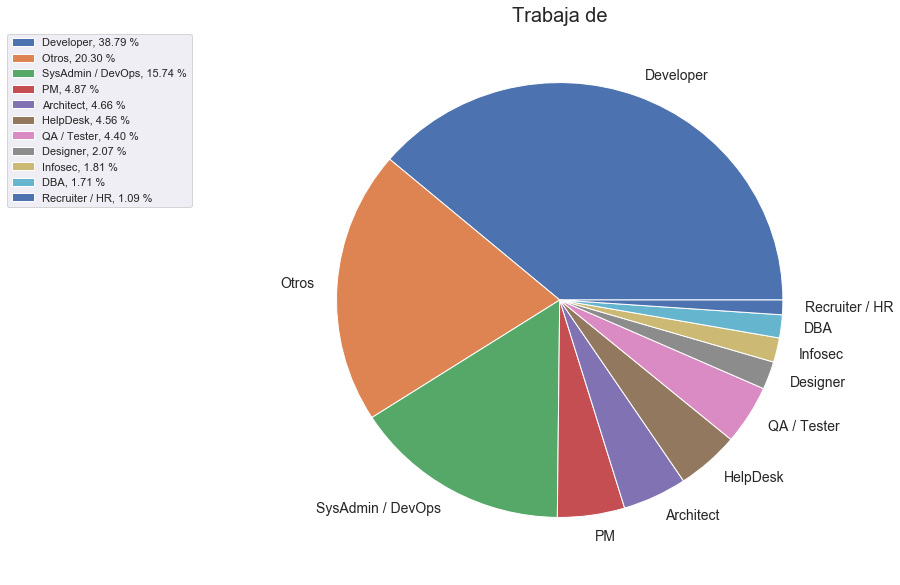

In [733]:
# Grafica torta con los principales puestos de trabajo
value_counts = encuesta['cat_puesto'].value_counts()
ax = value_counts.plot.pie(fontsize=14, title="Trabaja de",figsize=(10,10))
ax.title.set_size(20)

plt.legend( loc = 'upper left',bbox_to_anchor=(-0.5, 1), labels=['%s, %1.2f %%' % (l, 100 * s / len(encuesta['cat_puesto'])) for l, s in value_counts.iteritems()])
ax.set(ylabel='')
plt.show()

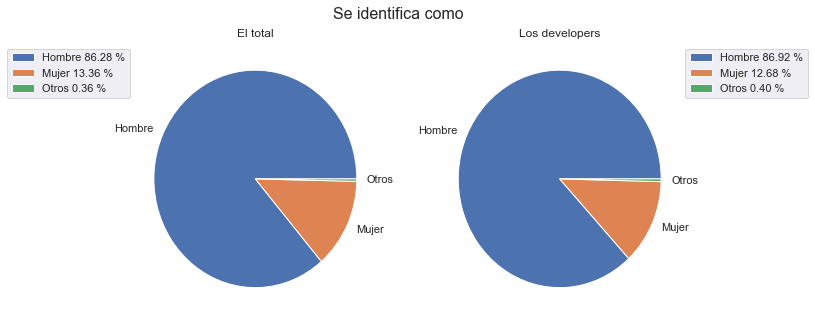

In [734]:
# Como se perciben del total de quienes completaron la encuesta vs los que son developer
pie_chart_total_vs_puesto(encuesta, 
                          "identifica",
                          puesto,
                          "Se identifica como", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()))


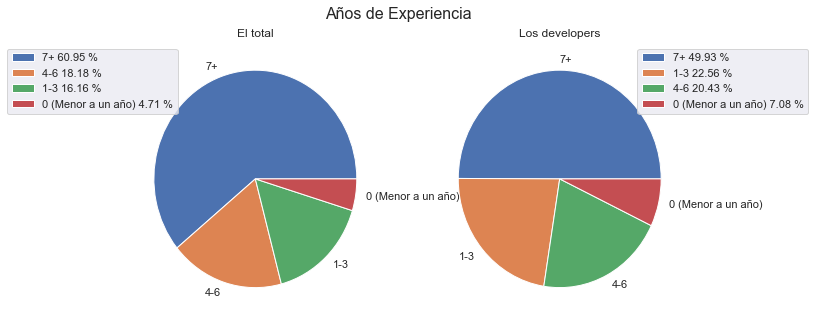

In [735]:
# Años de experiencia del total de quienes completaron la encuesta vs los que son developer
pie_chart_total_vs_puesto(encuesta, 
                          "cat_experiencia",
                          puesto,
                          "Años de Experiencia", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()))


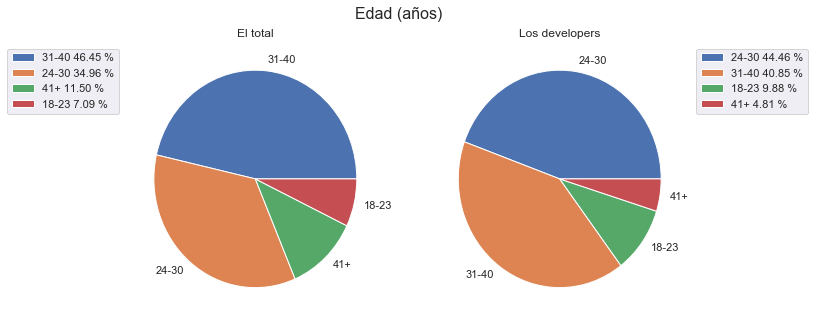

In [736]:
# Edad del total de quienes completaron la encuestavs los que son developer
pie_chart_total_vs_puesto(encuesta, 
                          "cat_edades",
                          puesto,
                          "Edad (años)", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()))


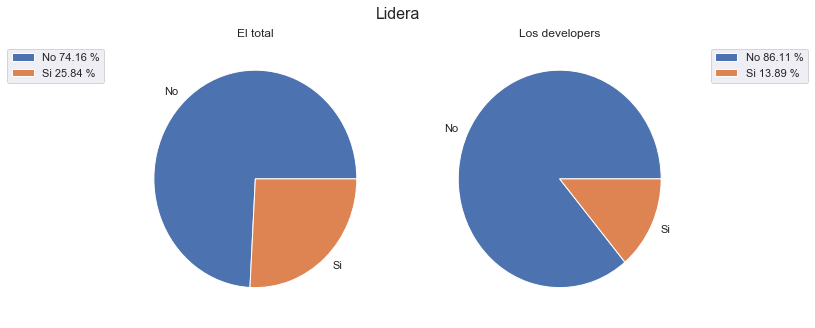

In [737]:
# Si lideran equipo (tienen gente a cargo) entre quienes completaron la encuesta vs los developers 
pie_chart_total_vs_puesto(encuesta, 
                          "lidera",
                          puesto,
                          "Lidera", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()))

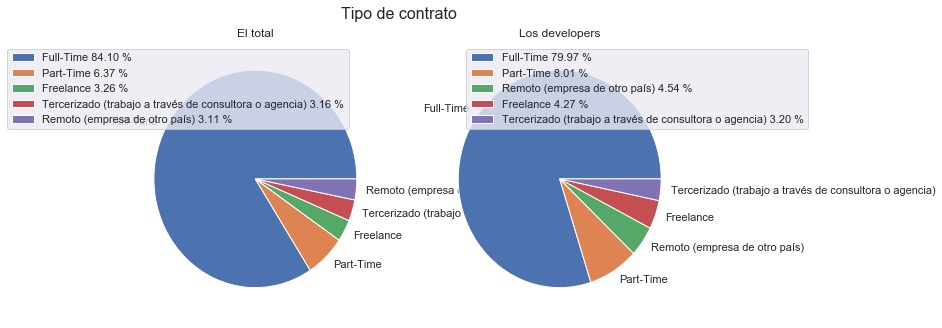

In [738]:
# Tipo de contrato entre quienes completaron la encuesta vs los developers 
pie_chart_total_vs_puesto(encuesta, 
                          "tipo_contrato",
                          puesto,
                          "Tipo de contrato", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()))

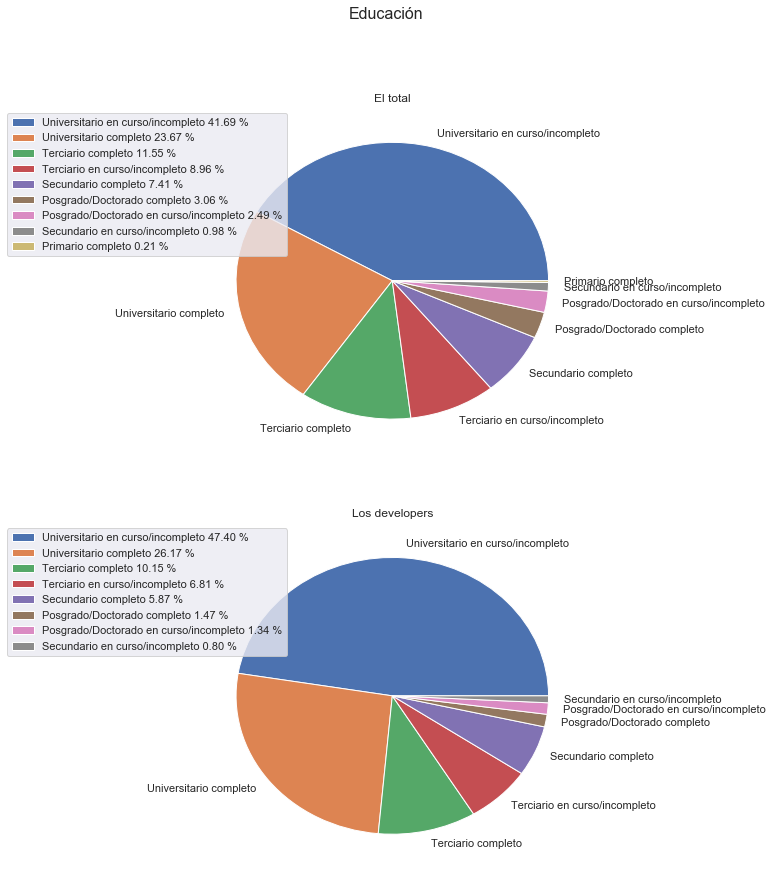

In [740]:
# Nivel de estudio entre quienes completaron la encuesta vs los developers
pie_chart_total_vs_puesto(encuesta, 
                          "cat_estudio",
                          puesto,
                          "Educación", 
                          "El total", 
                          "Los {0}s".format(puesto.lower()), False)

In [760]:
# Para crear graficos de torta del % de valores del indice
# para cada valor de la columna (visto como categoria) 
def pie_chart_crosstab(data, index_name, column):
   
    crosstab = pd.crosstab(data[index_name], data[column])
    subplot_rows = math.ceil(len(crosstab.columns)/2)
    axes = crosstab.plot.pie(subplots=True, sort_columns =True, fontsize=14,
                             layout=(subplot_rows,2),
                             figsize=(20, 10 * subplot_rows))
    # TODO Revisar loop
    t = 0
    for i in range(0,subplot_rows):
        for j in range(0,2):
            if len(crosstab.columns) > t:
                col_name = crosstab.columns[t]
                axes[i][j].set_title(col_name)
                axes[i][j].title.set_size(14)
                axes[i][j].set(ylabel='')
                axes[i][j].legend(loc = 'upper left',fontsize='large',
                                  bbox_to_anchor=(0, 1),
                                  labels=legend_labels(crosstab[col_name]))

                
                t = t + 1
    
    plt.show()

    

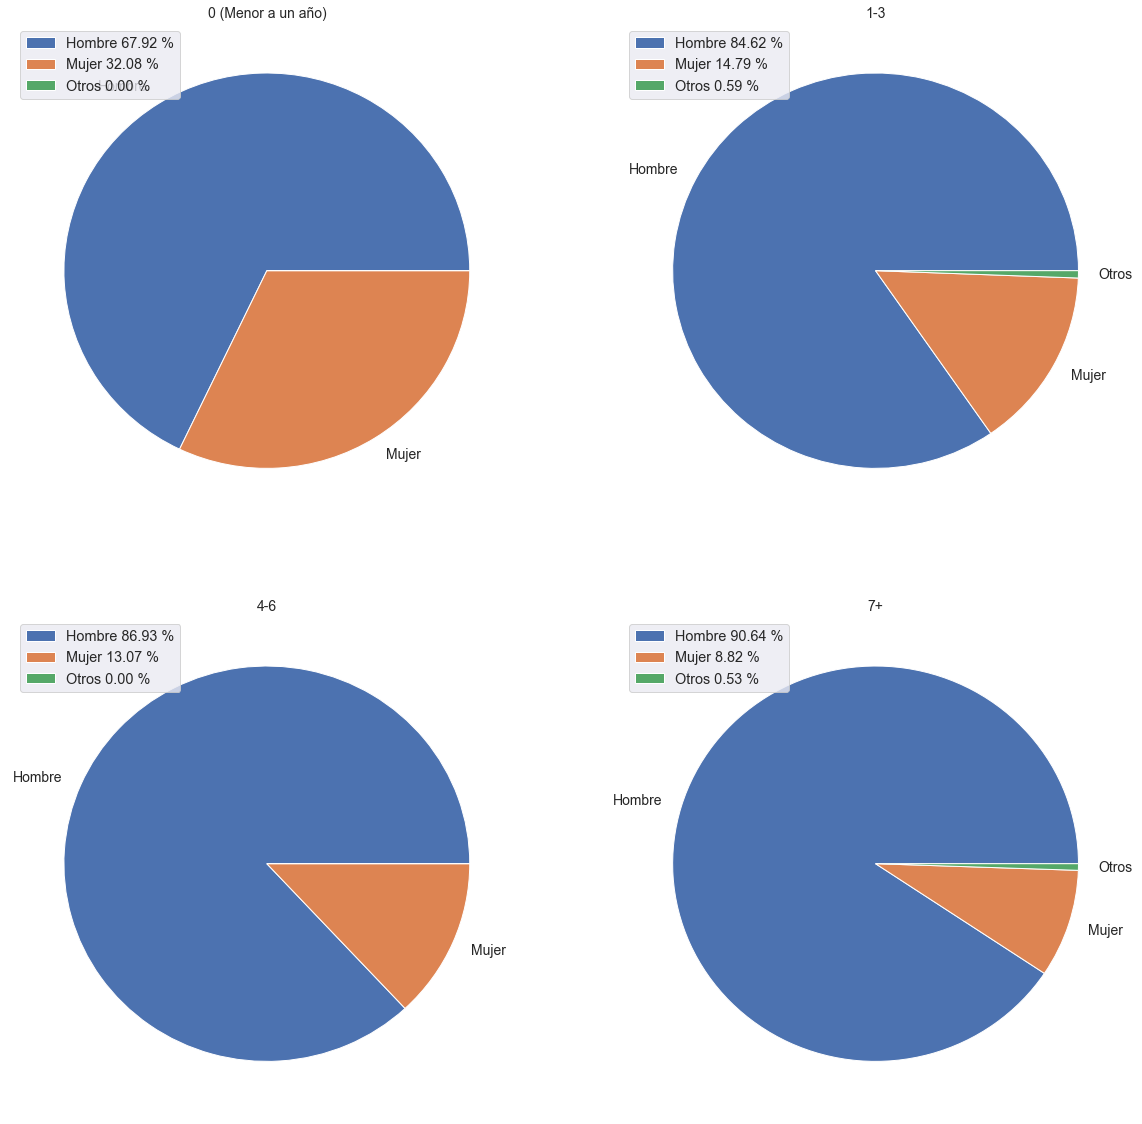

In [761]:
pie_chart_crosstab(encuesta_solo_puesto, "identifica", "cat_experiencia")


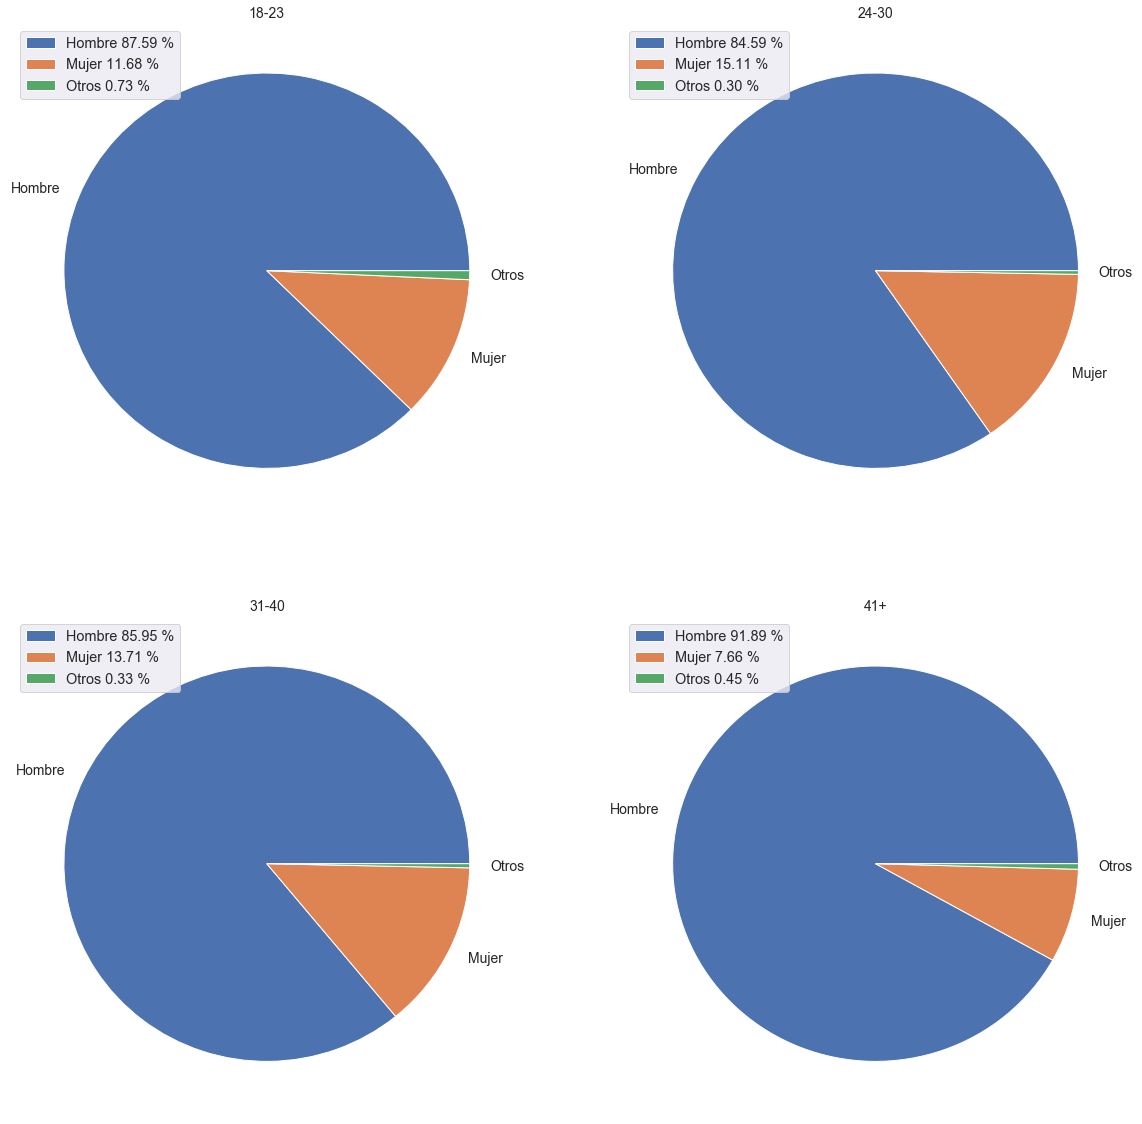

In [762]:
pie_chart_crosstab(encuesta, "identifica", "cat_edades")

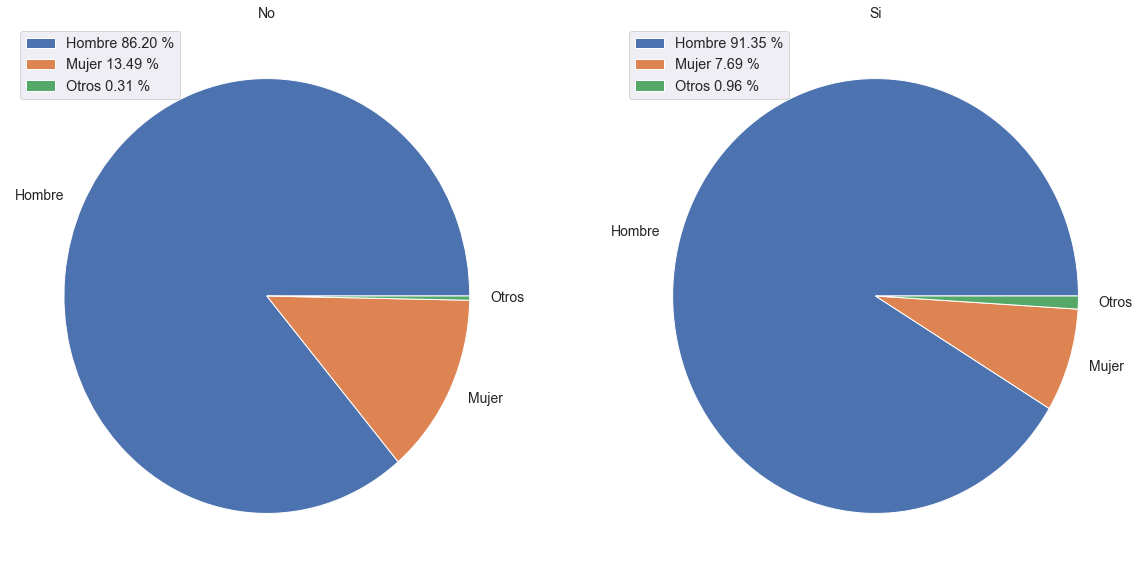

In [763]:
pie_chart_crosstab(encuesta_solo_puesto, "identifica", "lidera")

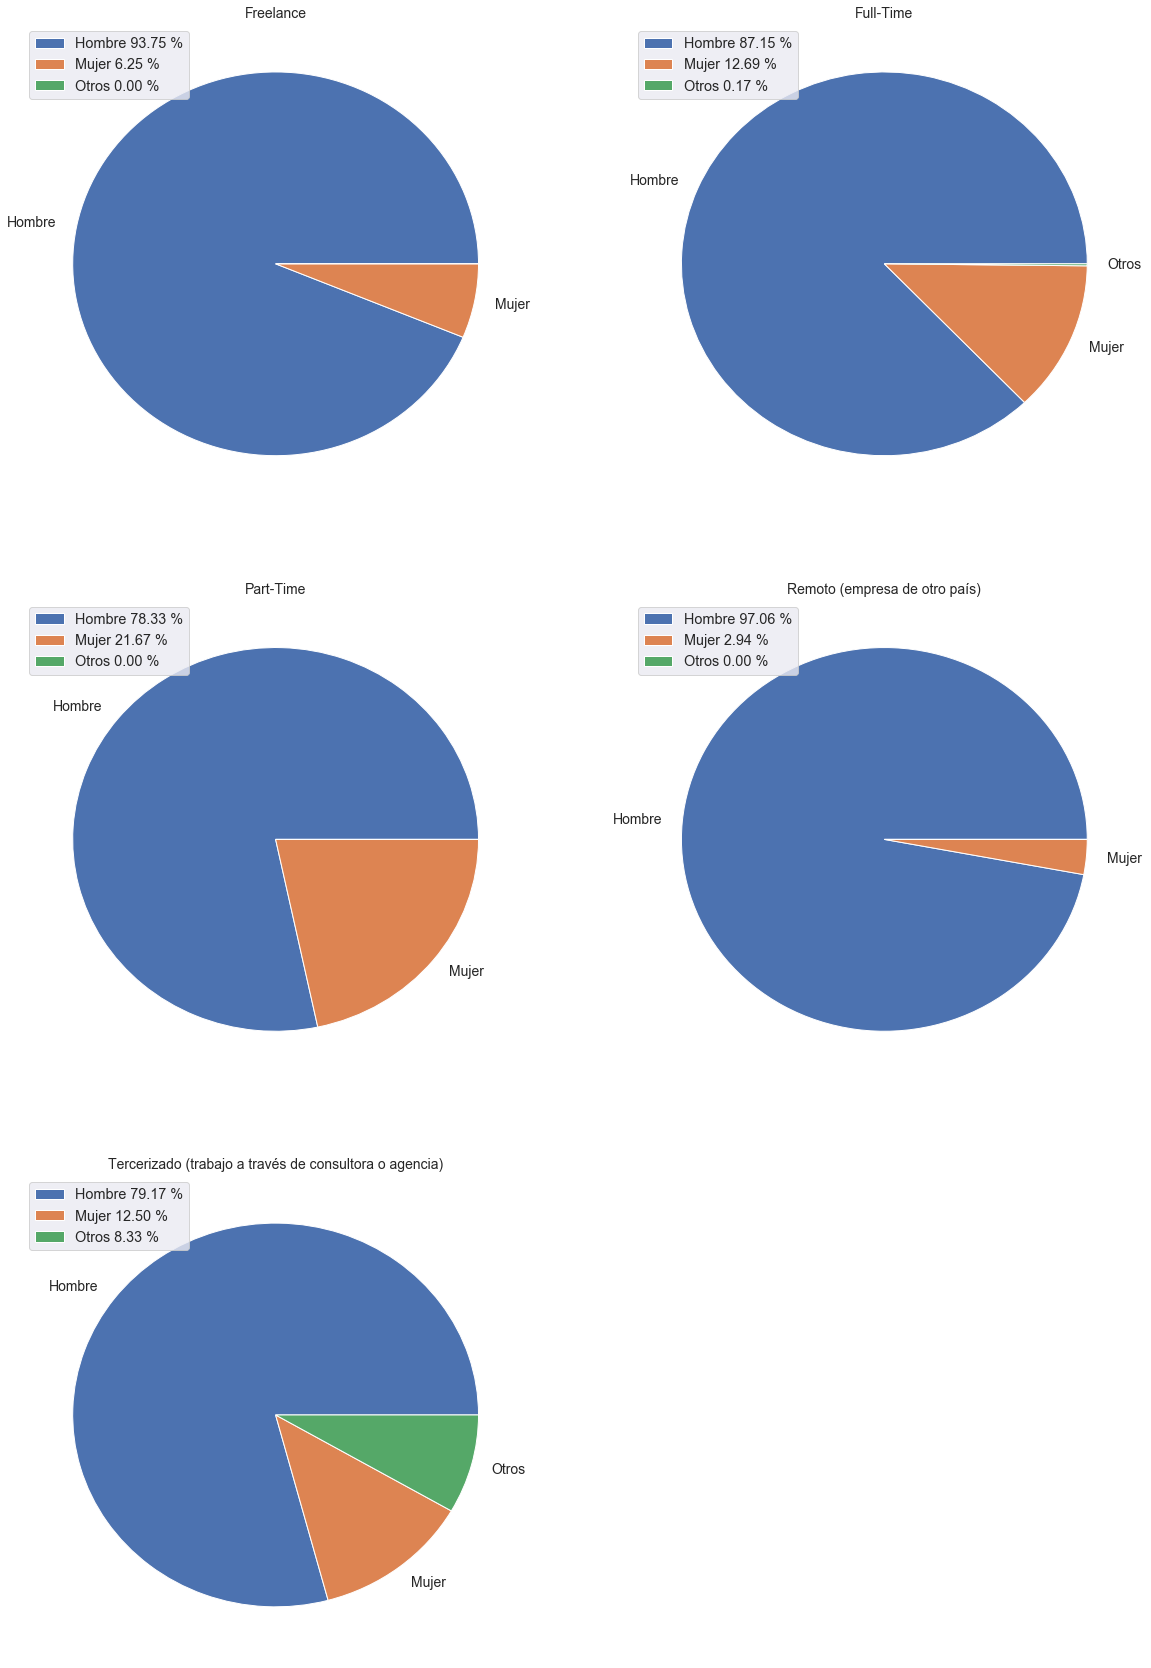

In [764]:
pie_chart_crosstab(encuesta_solo_puesto, "identifica", "tipo_contrato")

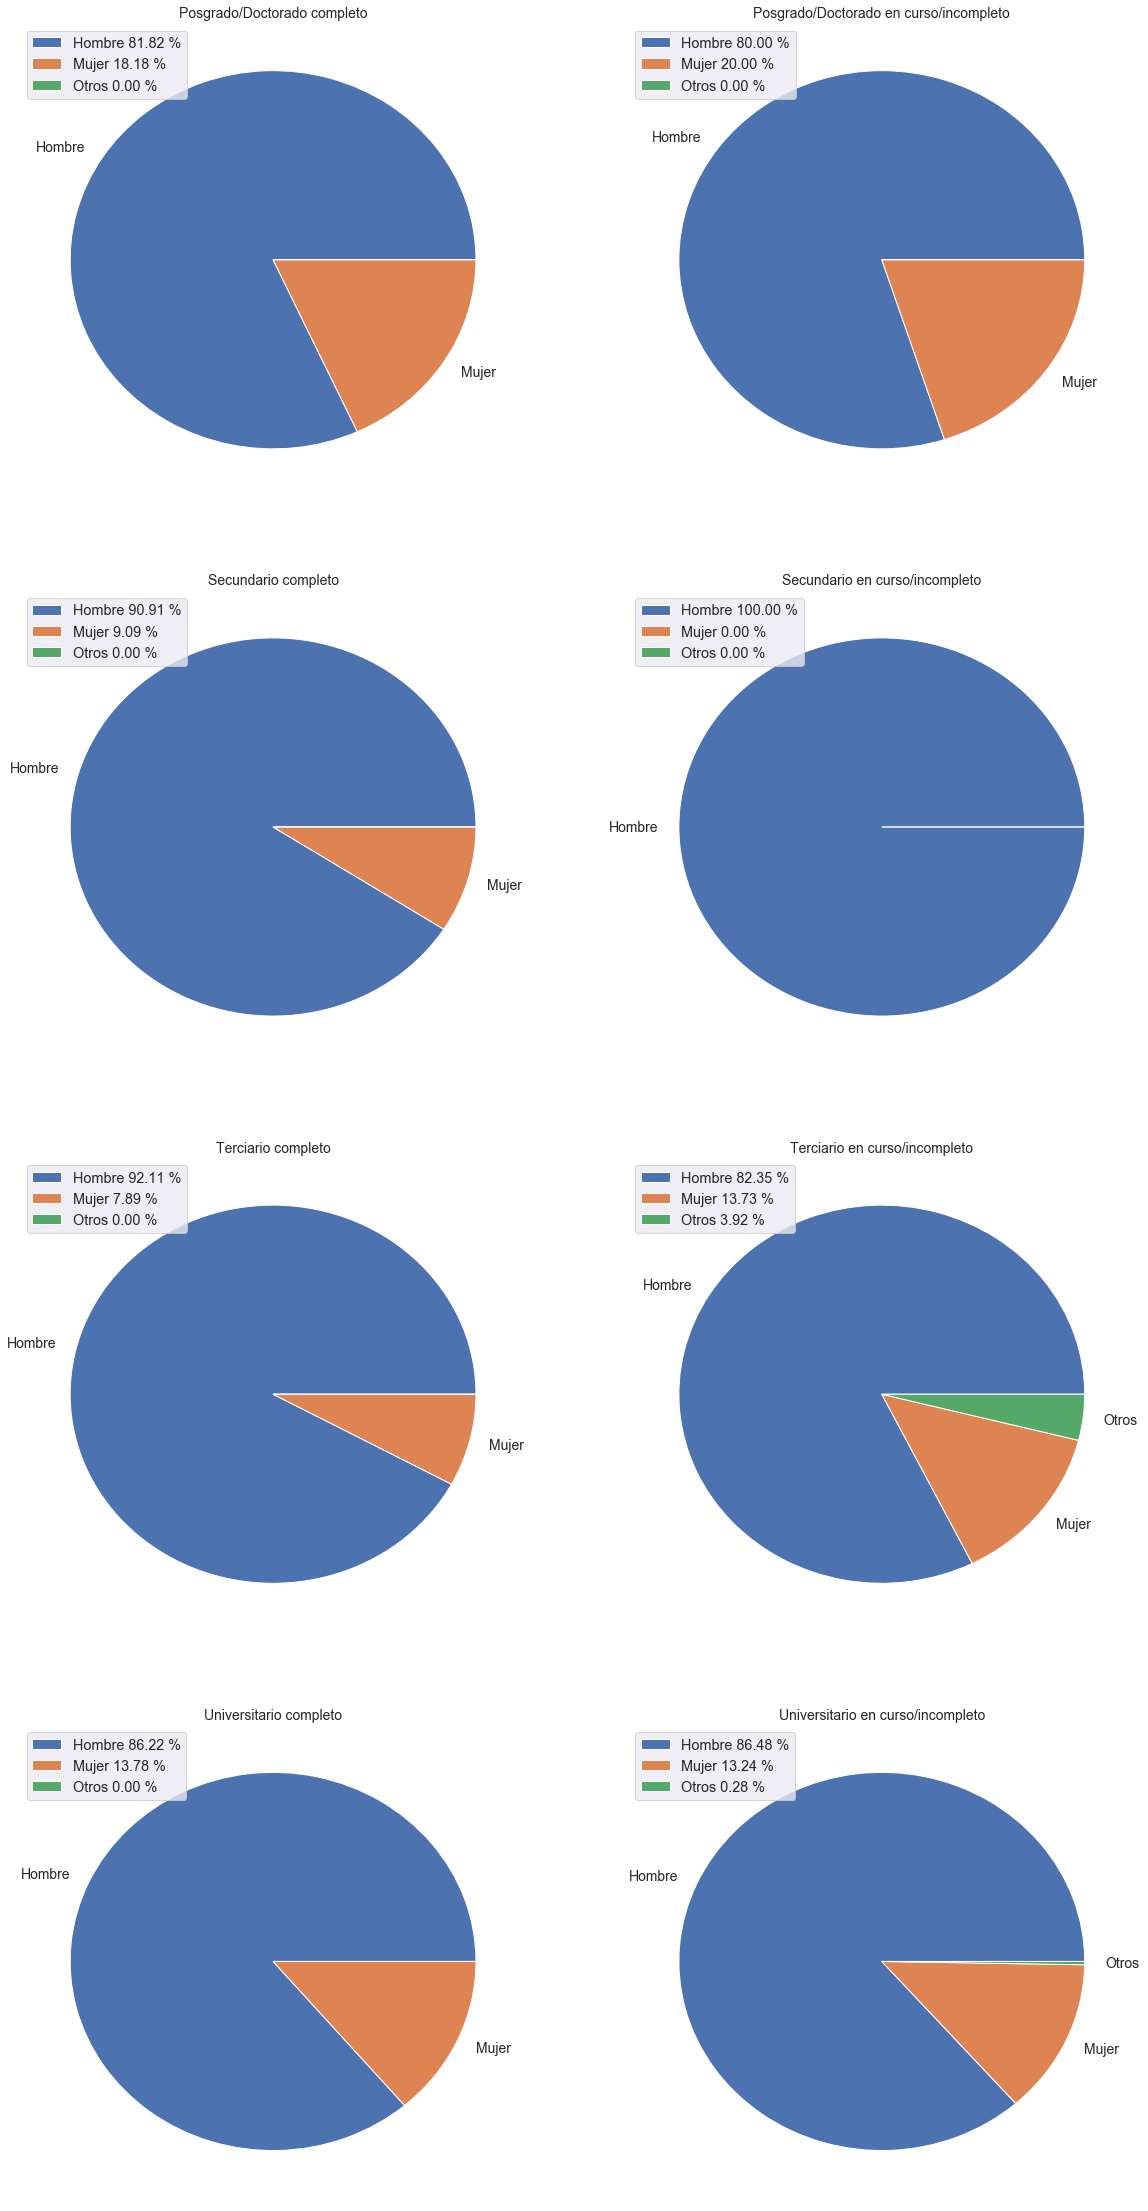

In [768]:
pie_chart_crosstab(encuesta_solo_puesto, "identifica", "cat_estudio")


In [882]:
print('Informacion sobre sueldo neto del total')
print(encuesta['sueldo_neto'].describe([.01,.02,0.03,.04,.05,0.1,.25,.5,.75,.9,.95,.98,.99]))

Sueldo neto del total
count      1931.000000
mean      41738.092165
std       37134.967874
min           5.000000
1%           20.169000
2%           33.200000
3%         4033.800000
4%         8300.000000
5%         9960.000000
10%       15770.000000
25%       21995.000000
50%       32785.000000
75%       50000.000000
90%       75000.000000
95%      100000.000000
98%      141460.000000
99%      189550.000000
max      600000.000000
Name: sueldo_neto, dtype: float64


In [883]:
print('Informacion sobre sueldo neto de los devs')
print(encuesta_solo_puesto['sueldo_neto'].describe([.01,.02,0.03,.04,.05,0.1,.25,.5,.75,.9,.95,.98,.99]))

Informacion sobre sueldo neto de los devs
count       749.000000
mean      42285.971541
std       38829.684983
min          10.052130
1%           24.948000
2%          132.576000
3%         7928.160000
4%         9960.000000
5%        12450.000000
10%       16162.590000
25%       22410.000000
50%       32500.000000
75%       49100.000000
90%       76400.000000
95%      105000.000000
98%      140000.000000
99%      183510.000000
max      600000.000000
Name: sueldo_neto, dtype: float64


In [ ]:
print('Informacion sobre sueldo neto de los hombres devs')
print(encuesta[(encuesta['puesto_actual'] == puesto) & 
         (encuesta['identifica'] == 'Hombre') & 
         (encuesta['tipo_contrato'] == 'Full-Time') &
         (encuesta['lidera'] == 'No') &
         (encuesta['sueldo_neto'] < 200000) &
         (encuesta['sueldo_neto'] > 150)]['sueldo_neto'].describe([.01,.05,0.1,.25,.5,.75,.9,.95,.99]))

In [885]:
print('Informacion sobre sueldo neto de las mujeres devs')
print(encuesta[(encuesta['puesto_actual'] == puesto) & 
               (encuesta['identifica'] == 'Mujer') &
               (encuesta['tipo_contrato'] == 'Full-Time') &
               (encuesta['lidera'] == 'No') &
               (encuesta['sueldo_neto'] < 200000) &
               (encuesta['sueldo_neto'] > 150)]['sueldo_neto'].describe([.01,.05,0.1,.25,.5,.75,.9,.95,.99]))

Informacion sobre sueldo neto de las mujeres devs
count       66.000000
mean     32469.292833
std      15636.457054
min      12450.000000
1%       12989.500000
5%       14583.286750
10%      16724.500000
25%      20812.500000
50%      29050.000000
75%      39000.000000
90%      52750.000000
95%      62750.000000
99%      78700.000000
max      80000.000000
Name: sueldo_neto, dtype: float64


In [884]:
print('Informacion sobre sueldo neto de las otros devs')
print(encuesta[(encuesta['puesto_actual'] == puesto) & 
               (encuesta['identifica'] == 'Otros') &
               (encuesta['tipo_contrato'] == 'Full-Time') &
               (encuesta['lidera'] == 'No') &
               (encuesta['sueldo_neto'] < 200000) &
               (encuesta['sueldo_neto'] > 150)]['sueldo_neto'].describe([.01,.05,0.1,.25,.5,.75,.9,.95,.99]))

Informacion sobre sueldo neto de las mujeres devs
count        1.0
mean     29050.0
std          NaN
min      29050.0
1%       29050.0
5%       29050.0
10%      29050.0
25%      29050.0
50%      29050.0
75%      29050.0
90%      29050.0
95%      29050.0
99%      29050.0
max      29050.0
Name: sueldo_neto, dtype: float64


In [823]:
# Funcion para armar los xticklabels en el violinplot
# para que incluya las cantidades de cada valor del parametro hue
def hue_quantity_labels(crosstab, columns):
    labels = []
    for column in columns:
        hue_info = []
        for name, quantity in crosstab[column].iteritems():
            hue_info.append('{0} = {1}'.format(name, quantity, column))
        labels.append('{0}\n{1}'.format(column, ', '.join(hue_info)))
    return labels

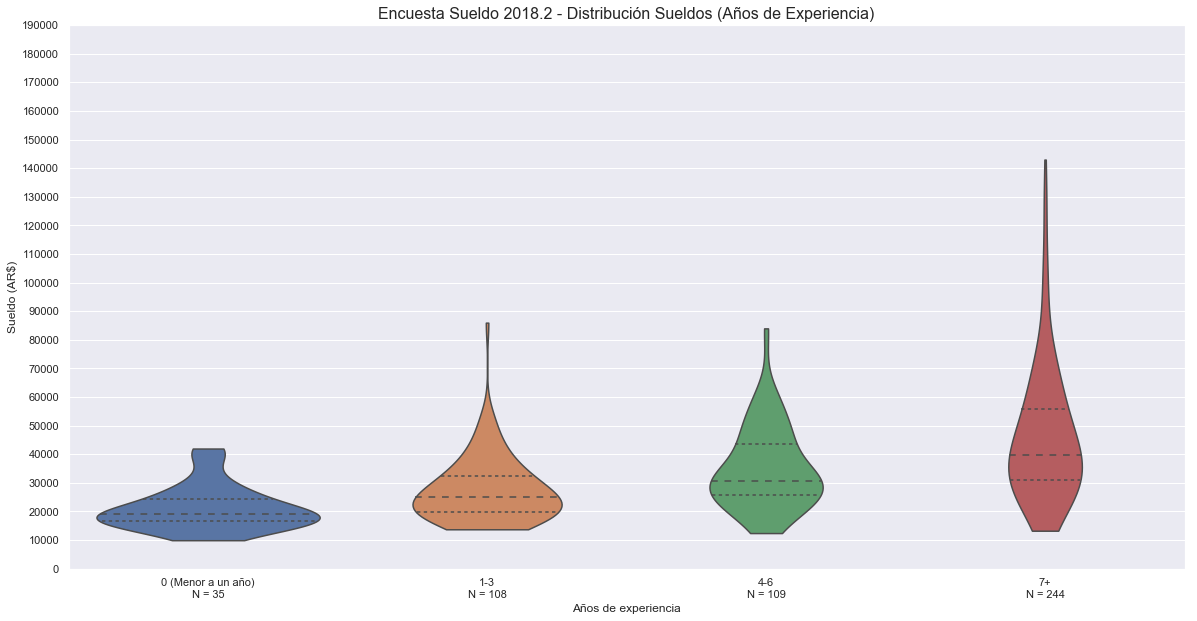

In [865]:
sns.set()
df = encuesta[(encuesta['puesto_actual'] == puesto) & 
              (encuesta['lidera'] == 'No') &
              (encuesta['tipo_contrato'] == 'Full-Time') &
              (encuesta['sueldo_neto'] < 200000) &
              (encuesta['sueldo_neto'] > 150)]
                
fig = plt.figure(figsize=(20,10))
ax = sns.violinplot(x="cat_experiencia", y="sueldo_neto",  order=exp_order,
                     data=df, inner='quartile', bw=.5, cut=0, split=True)

ax.set_yticks(range(0, 200000, 10000))

ax.set_xlabel('Años de experiencia')
ax.set_ylabel('Sueldo (AR$)')
ax.set_title('Encuesta Sueldo 2018.2 - Distribución Sueldos (Años de Experiencia)', fontsize=16)

label_total = df['cat_experiencia'].value_counts()
ax.set_xticklabels(['{0}\nN = {1}'.format(label, label_total.loc[[label]][0]) for label in exp_order])
plt.show()

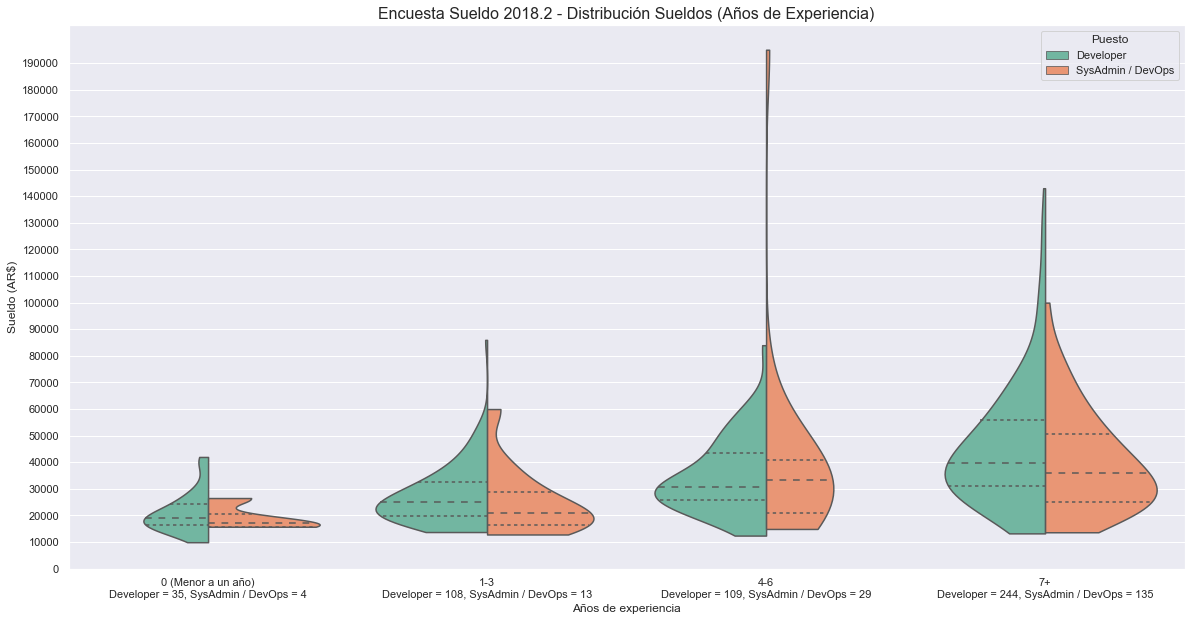

In [881]:
# Para graficar un violin plot entre devs y sysadmins full-time sin gente a cargo
# los cortes en 
devs_sysadmin_no_lead = encuesta[(encuesta['lidera'] == 'No') & 
                                 (encuesta['cat_puesto'].isin(['Developer', 'SysAdmin / DevOps']))&
                                 (encuesta['tipo_contrato'] == 'Full-Time') &
                                 (encuesta['sueldo_neto'] < 200000) &
                                 (encuesta['sueldo_neto'] > 150)]


exp_devs_sysadmin_ct = pd.crosstab(devs_sysadmin_no_lead["cat_puesto"],
                                   devs_sysadmin_no_lead["cat_experiencia"])
sns.set()

fig = plt.figure(figsize=(20,10))
ax = sns.violinplot(x="cat_experiencia", y="sueldo_neto", hue="cat_puesto", order=exp_order,
                     data=devs_sysadmin_no_lead, palette="Set2",inner='quartile', scale='area', bw=.5, cut=0, split=True)

ax.set_yticks(range(0, 200000, 10000))

ax.set_xlabel('Años de experiencia')
ax.set_ylabel('Sueldo (AR$)')
l = ax.legend()
l.set_title('Puesto')
ax.set_title('Encuesta Sueldo 2018.2 - Distribución Sueldos (Años de Experiencia)', fontsize=16)
ax.set_xticklabels(hue_quantity_labels(exp_devs_sysadmin_ct, exp_order))
plt.show()

In [872]:
# Filtro lo que interesa ver en lo violin plots de devs hombre  mujer
plot_df = encuesta[(encuesta['puesto_actual'] == puesto) & 
                   (encuesta['identifica'] != 'Otros') & 
                   (encuesta['lidera'] == 'No') &
                   (encuesta['tipo_contrato'] == 'Full-Time') &
                   (encuesta['sueldo_neto'] < 200000) &
                   (encuesta['sueldo_neto'] > 150)]

edad_ct = pd.crosstab(plot_df["identifica"],
                      plot_df["cat_edades"])

experiencia_ct = pd.crosstab(plot_df["identifica"],
                      plot_df["cat_experiencia"])


# Orden a usar en los ejes x
exp_order = ["0 (Menor a un año)", "1-3", "4-6","7+"]
edad_order = ["18-23","24-30","31-40","41+"]

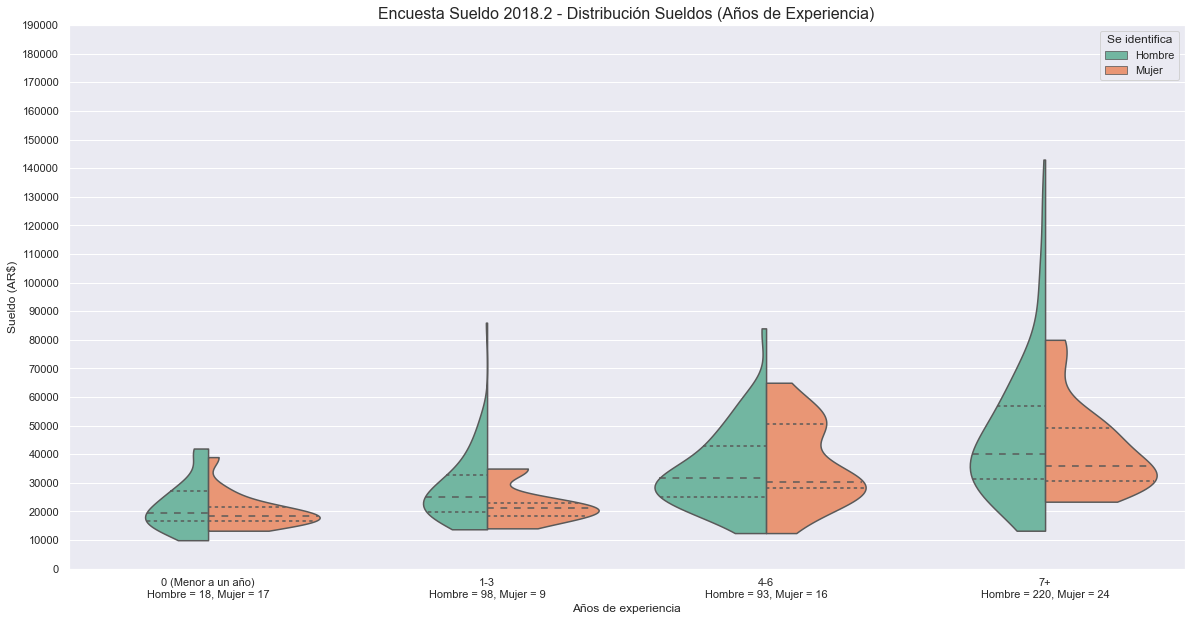

In [878]:
sns.set()

fig = plt.figure(figsize=(20,10))
ax = sns.violinplot(x="cat_experiencia", y="sueldo_neto", hue="identifica", order=exp_order,
                     data=plot_df, palette="Set2",inner='quartile', scale='area', bw=.5, cut=0, split=True)

ax.set_yticks(range(0, 200000, 10000))

ax.set_xlabel('Años de experiencia')
ax.set_ylabel('Sueldo (AR$)')
l = ax.legend()
l.set_title('Se identifica')
ax.set_title('Encuesta Sueldo 2018.2 - Distribución Sueldos (Años de Experiencia)', fontsize=16)
ax.set_xticklabels(hue_quantity_labels(experiencia_ct, exp_order))
plt.show()

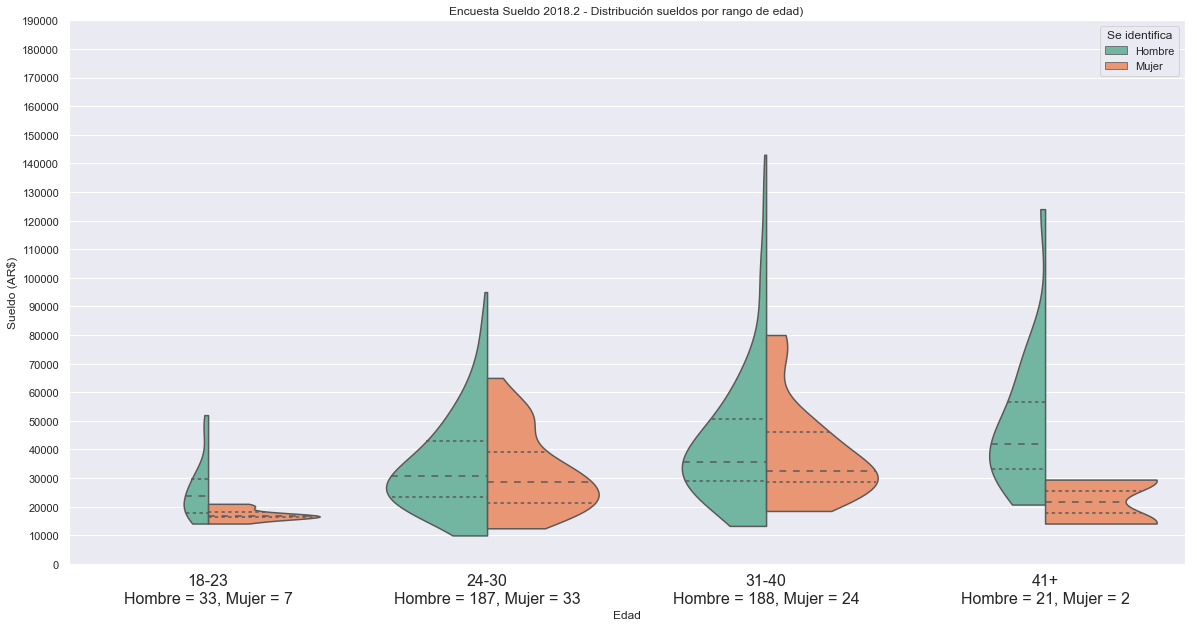

In [879]:
sns.set()

fig = plt.figure(figsize=(20,10))
# exp_order = ["Menos de un año", "1", "2", "3", "4", "5","6","7","8","9","10+"]
ax = sns.violinplot(x="cat_edades", y="sueldo_neto", hue="identifica", order=edad_order,
                     data=plot_df, palette="Set2", cut=0,inner='quartile',  scale='area', bw=.5, split=True)

ax.set_yticks(range(0, 200000, 10000))
ax.set_xlabel('Edad')
ax.set_ylabel('Sueldo (AR$)')
l = ax.legend()
l.set_title('Se identifica')
ax.set_title('Encuesta Sueldo 2018.2 - Distribución sueldos por rango de edad)')
ax.set_xticklabels(hue_quantity_labels(edad_ct, edad_order), fontsize=16)

plt.show()
